# ERD

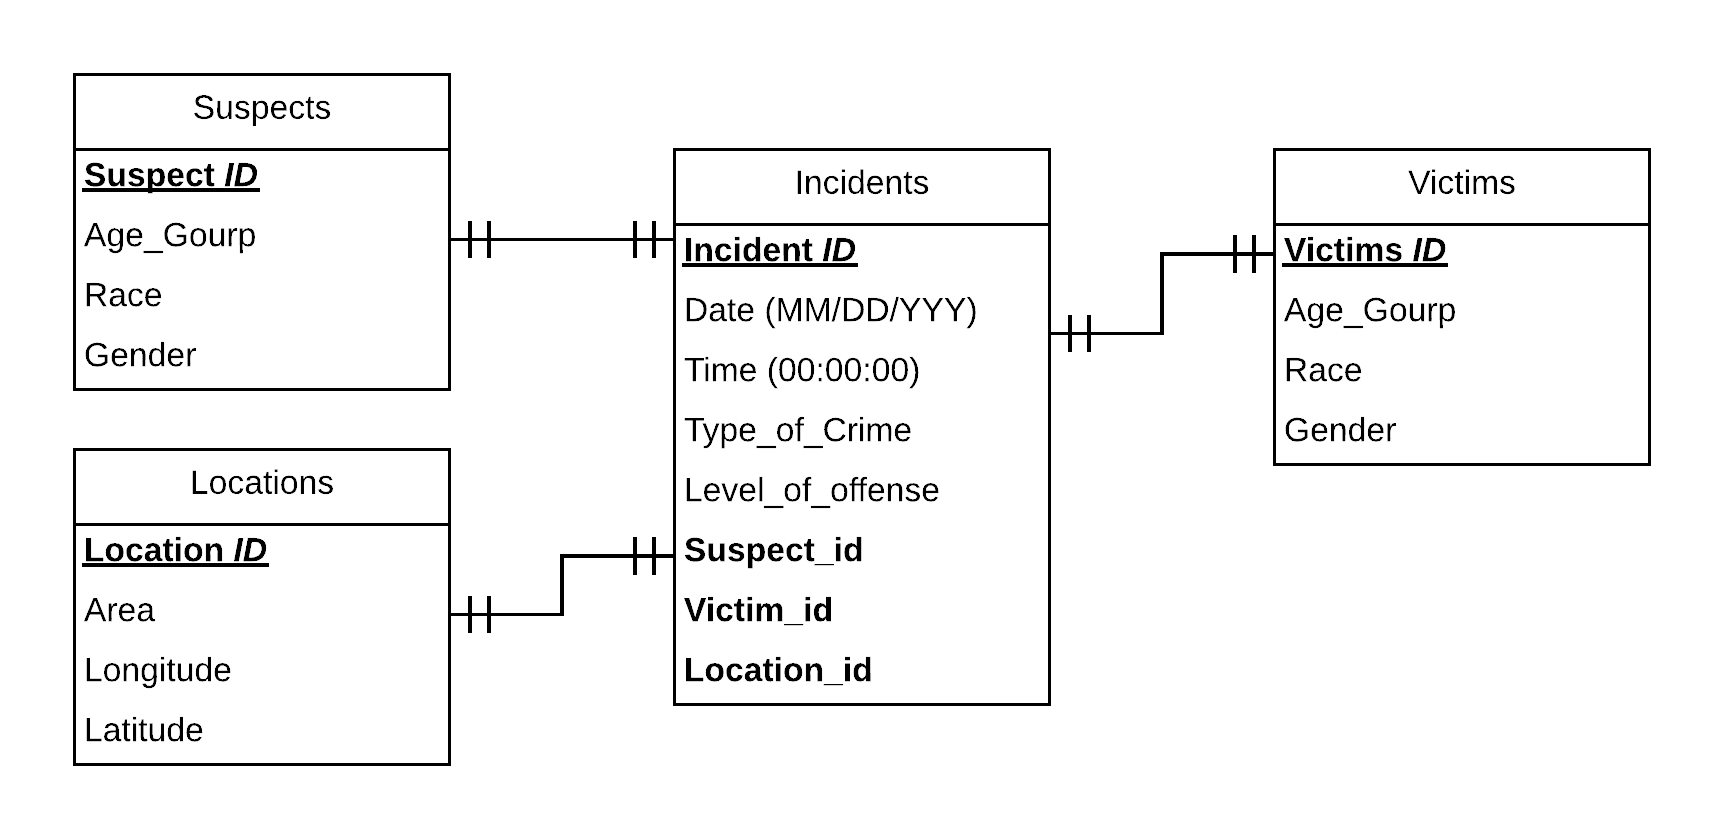

In [1]:
from IPython.display import Image
Image(filename='ERD.png') 

# Loading Data from CSV file

In [1]:
import csv
import numpy as np
import pandas as pd
data = []

# count down
count = 0

with open('dataset/NYPD_Complaint_Data_Current__Year_To_Date_.csv', newline='') as f:
    reader = csv.reader(f)
    for line in reader:
        count += 1
        data.append(line)
        #count
        #if count > 300:
            #break

# Mapping: Index with Columns

In [2]:
# Columns mapping with its index
columns = {}

for i in range(len(data[0])):
    columns[i] = data[0][i]

print(columns)

def get_index(name):
    for ind in columns:
        if columns[ind] == name:
            return ind
    return 'No such Column'

{0: 'CMPLNT_NUM', 1: 'ADDR_PCT_CD', 2: 'BORO_NM', 3: 'CMPLNT_FR_DT', 4: 'CMPLNT_FR_TM', 5: 'CMPLNT_TO_DT', 6: 'CMPLNT_TO_TM', 7: 'CRM_ATPT_CPTD_CD', 8: 'HADEVELOPT', 9: 'HOUSING_PSA', 10: 'JURISDICTION_CODE', 11: 'JURIS_DESC', 12: 'KY_CD', 13: 'LAW_CAT_CD', 14: 'LOC_OF_OCCUR_DESC', 15: 'OFNS_DESC', 16: 'PARKS_NM', 17: 'PATROL_BORO', 18: 'PD_CD', 19: 'PD_DESC', 20: 'PREM_TYP_DESC', 21: 'RPT_DT', 22: 'STATION_NAME', 23: 'SUSP_AGE_GROUP', 24: 'SUSP_RACE', 25: 'SUSP_SEX', 26: 'TRANSIT_DISTRICT', 27: 'VIC_AGE_GROUP', 28: 'VIC_RACE', 29: 'VIC_SEX', 30: 'X_COORD_CD', 31: 'Y_COORD_CD', 32: 'Latitude', 33: 'Longitude', 34: 'Lat_Lon'}


In [3]:
# select columns that we need to create database
vic = ['VIC_AGE_GROUP','VIC_RACE','VIC_SEX']
sup = ['SUSP_AGE_GROUP','SUSP_RACE','SUSP_SEX']
incident= ['CMPLNT_FR_DT','CMPLNT_FR_TM','PREM_TYP_DESC','PD_DESC','LAW_CAT_CD','PD_CD']
location = ['BORO_NM','Latitude','Longitude']

# Look at the data

In [4]:
def get_column(name):
    result = []
    ind = get_index(name)
    for r in data:
        result.append(r[ind])
    return result[1:len(result)]

In [8]:
get_column('LAW_CAT_CD')

['VIOLATION',
 'FELONY',
 'MISDEMEANOR',
 'FELONY',
 'FELONY',
 'MISDEMEANOR',
 'MISDEMEANOR',
 'VIOLATION',
 'FELONY',
 'MISDEMEANOR',
 'VIOLATION',
 'FELONY',
 'FELONY',
 'FELONY',
 'MISDEMEANOR',
 'FELONY',
 'FELONY',
 'MISDEMEANOR',
 'FELONY',
 'VIOLATION',
 'MISDEMEANOR',
 'FELONY',
 'FELONY',
 'FELONY',
 'MISDEMEANOR',
 'FELONY',
 'FELONY',
 'VIOLATION',
 'MISDEMEANOR',
 'FELONY',
 'VIOLATION',
 'MISDEMEANOR',
 'MISDEMEANOR',
 'FELONY',
 'MISDEMEANOR',
 'MISDEMEANOR',
 'MISDEMEANOR',
 'MISDEMEANOR',
 'MISDEMEANOR',
 'FELONY',
 'MISDEMEANOR',
 'VIOLATION',
 'MISDEMEANOR',
 'FELONY',
 'VIOLATION',
 'MISDEMEANOR',
 'FELONY',
 'VIOLATION',
 'MISDEMEANOR',
 'VIOLATION',
 'MISDEMEANOR',
 'FELONY',
 'MISDEMEANOR',
 'MISDEMEANOR',
 'FELONY',
 'MISDEMEANOR',
 'MISDEMEANOR',
 'FELONY',
 'MISDEMEANOR',
 'FELONY',
 'FELONY',
 'VIOLATION',
 'MISDEMEANOR',
 'FELONY',
 'MISDEMEANOR',
 'FELONY',
 'MISDEMEANOR',
 'FELONY',
 'FELONY',
 'MISDEMEANOR',
 'FELONY',
 'FELONY',
 'MISDEMEANOR',
 'FELONY'

In [5]:
## Helper functions

import os
import sqlite3
from sqlite3 import Error
import gzip

def create_connection(db_file, delete_db=False):
    if delete_db and os.path.exists(db_file):
        os.remove(db_file)
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn


def create_table(conn, create_table_sql):
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
# Creating lab2.db 
db_file = 'crime_analysis_1.db'
conn = create_connection(db_file, delete_db=True)
conn.close()

In [6]:
header = data[0]
data = data[1:len(data)]
vic = ['VIC_AGE_GROUP','VIC_RACE','VIC_SEX']
sup = ['SUSP_AGE_GROUP','SUSP_RACE','SUSP_SEX']
incident= ['CMPLNT_FR_DT','CMPLNT_FR_TM','PREM_TYP_DESC','PD_DESC','LAW_CAT_CD','PD_CD']
location = ['BORO_NM','Latitude','Longitude']
index_dic = {'Victim' : ['VIC_AGE_GROUP','VIC_RACE','VIC_SEX'],
'Suspect' : ['SUSP_AGE_GROUP','SUSP_RACE','SUSP_SEX'],
'Incidents': ['CMPLNT_FR_DT','CMPLNT_FR_TM','PREM_TYP_DESC','PD_DESC','LAW_CAT_CD','PD_CD'],
'Locations': ['BORO_NM','Latitude','Longitude']}

def create_pdtable(table_name):
    table = pd.DataFrame()
    dic = {}
    for item in table_name:
        dic[item] = get_column(item)
    table = pd.DataFrame(dic)
    table.insert(0,'ID', table.index)
    return table

In [7]:
victim_table = create_pdtable(vic)
suspect_table = create_pdtable(sup)
# incidnet table
incident_table = create_pdtable(incident)
incident_table['s_id'] = incident_table.index
incident_table['v_id'] = incident_table.index
incident_table['l_id'] = incident_table.index

location_table = create_pdtable(location)


In [8]:
def format_records(list_columns):
    dic = {}
    for i in list_columns:
        dic[i] = get_column(i)
    return dic
v_records = format_records(vic)
s_records = format_records(sup)

# Create Suspect & victim table

In [18]:
# Creating database
db_file = 'crime_analysis_1.db'
conn = create_connection(db_file, delete_db=True)
conn.close()

s_v_tables = ['Suspect', 'Victim']
conn = sqlite3.connect('crime_analysis_1.db')
c = conn.cursor()
#create table
for name in s_v_tables:
    fst = name + '_id'
    c.execute('''
        CREATE TABLE IF NOT EXISTS %s (
        %s INTEGER NOT NULL PRIMARY KEY,
        Age_group TEXT,
        Race TEXT,
        Sex TEXT);'''%(name,fst))
# insert values
c.executemany('''insert into Victim values(?,?,?,?);''',(victim_table.values))
c.executemany('''insert into Suspect values(?,?,?,?);''',(suspect_table.values))
conn.commit()
c.close()
conn.close()

# Create Incients table

In [19]:
conn = sqlite3.connect('crime_analysis_1.db')
c = conn.cursor()
#create incidents table
c.execute('''CREATE TABLE IF NOT EXISTS Incidents (
    Incident_id INTEGER NOT NULL PRIMARY KEY,
    Date TEXT,
    Time TEXT,
    Type_of_Building TEXT,
    Type_of_Crime TEXT,
    Level_of_offense TEXT,
    PD_Code INTEGER,
    Suspect_id INTEGER,
    Victim_id INTEGER,
    Location_id INTEGER,
    FOREIGN KEY (Suspect_id)  REFERENCES Suspect (Suspect_id)    ON DELETE CASCADE,
    FOREIGN KEY (Victim_id) REFERENCES Victim (Victim_id) ON DELETE CASCADE,
    FOREIGN KEY (Location_id) REFERENCES Locations (Location_id) ON DELETE CASCADE);''')

#create locations table
c.execute('''CREATE TABLE IF NOT EXISTS Locations (
    Location_id INTEGER NOT NULL PRIMARY KEY,
    Area TEXT,
    Latitude REAL,
    Longitude REAL);''')

#insert values
c.executemany('''insert into Locations values(?,?,?,?);''',(location_table.values))
conn.commit()

# insert values to incidents table
c.executemany('''insert into Incidents values(?,?,?,?,?,?,?,?,?,?);''',(incident_table.values))
conn.commit()

c.close()
conn.close()